# Análisis exploratorio de incidencia delictiva en México

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153600 entries, 0 to 153599
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   anio            153600 non-null  int64         
 1   clave_ent       153600 non-null  int64         
 2   entidad         153600 non-null  object        
 3   tipo_de_delito  153600 non-null  object        
 4   nombre_mes      153600 non-null  object        
 5   fecha           153600 non-null  datetime64[ns]
 6   frecuencia      153600 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 8.2+ MB
['Aborto' 'Abuso de confianza' 'Abuso sexual' 'Acoso sexual'
 'Allanamiento de morada' 'Amenazas' 'Contra el medio ambiente'
 'Corrupción de menores' 'Daño a la propiedad'
 'Delitos cometidos por servidores públicos' 'Despojo' 'Electorales'
 'Evasión de presos' 'Extorsión' 'Falsedad' 'Falsificación' 'Feminicidio'
 'Fraude' 'Homici

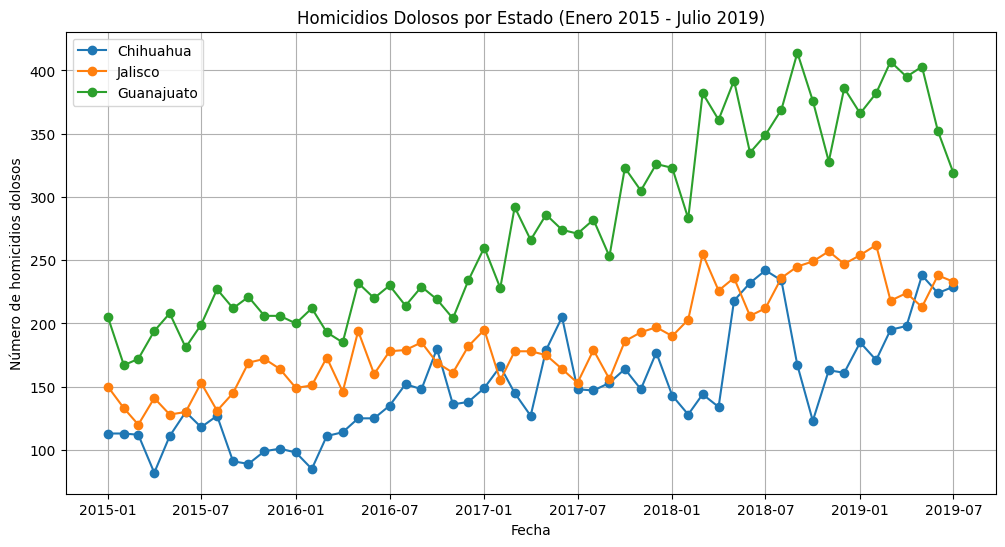

In [ ]:
# Revisar las primeras filas
df.head()

# Revisar los nombres de las columnas
df.columns

# Revisar el tipo de datos
df.info()

df['entidad'].unique()

estados = ['Colima', 'Jalisco', 'Guanajuato']


df['fecha'] = pd.to_datetime(df['fecha'])

inicio = '2015-01-01'
fin = '2019-07-31'

df['tipo_de_delito'].unique()
print (df['tipo_de_delito'].unique())

df_filtrado = df[(df['fecha'] >= inicio) & (df['fecha'] <= fin)]
df_homicidios = df_filtrado[df_filtrado['tipo_de_delito'] == 'Homicidio']

df_homicidios = df_homicidios[df_homicidios['entidad'].isin(estados)]

serie_tiempo = df_homicidios.groupby(['fecha', 'entidad'])['frecuencia'].sum().unstack()

print(serie_tiempo.columns)


plt.figure(figsize=(12,6))
for estado in estados:
    plt.plot(serie_tiempo.index, serie_tiempo[estado], marker='o', label=estado)

plt.title("Homicidios Dolosos por Estado (Enero 2015 - Julio 2019)")
plt.xlabel("Fecha")
plt.ylabel("Número de homicidios dolosos")
plt.legend()
plt.grid(True)
plt.show()


#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [15]:
homicidios_colima_2018 = df[(df['entidad'] == 'Colima') &
                             (df['anio'] == 2018) &
                             (df['tipo_de_delito'] == 'Homicidio doloso')]['frecuencia'].sum()

print("Homicidios dolosos en Colima 2018:", homicidios_colima_2018)

##2

robos_2019 = df[(df['anio'] == 2019) &
                 (df['tipo_de_delito'] == 'Robo de vehículo automotor')]['frecuencia'].sum()

print("Robos de vehículo automotor en 2019:", robos_2019)

##3

delitos_suma_anio = df[df['tipo_de_delito'].isin(['Homicidio doloso', 'Feminicidio'])] \
                        .groupby('anio')['frecuencia'].sum()

print("Suma de homicidios dolosos y feminicidios por año:")
print(delitos_suma_anio)


##4

max_feminicidios = df[df['tipo_de_delito'] == 'Feminicidio'] \
                     .groupby(['nombre_mes', 'entidad'])['frecuencia'].sum().idxmax()

print("Mes y municipio con mayor número de feminicidios:", max_feminicidios)

##5

max_feminicidios_estado = df[df['tipo_de_delito'] == 'Feminicidio'] \
                            .groupby(['anio', 'entidad'])['frecuencia'].sum().idxmax()

print("Año y estado con mayor número de feminicidios:", max_feminicidios_estado)

Homicidios dolosos en Colima 2018: 0.0
Robos de vehículo automotor en 2019: 0.0
Suma de homicidios dolosos y feminicidios por año:
anio
2015    413.0
2016    608.0
2017    744.0
2018    899.0
2019    944.0
2020    947.0
2021    981.0
2022    961.0
2023    832.0
2024    401.0
Name: frecuencia, dtype: float64
Mes y municipio con mayor número de feminicidios: ('agosto', 'México')
Año y estado con mayor número de feminicidios: (np.int64(2020), 'México')


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

/tmp/ipykernel_2065/1422465249.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


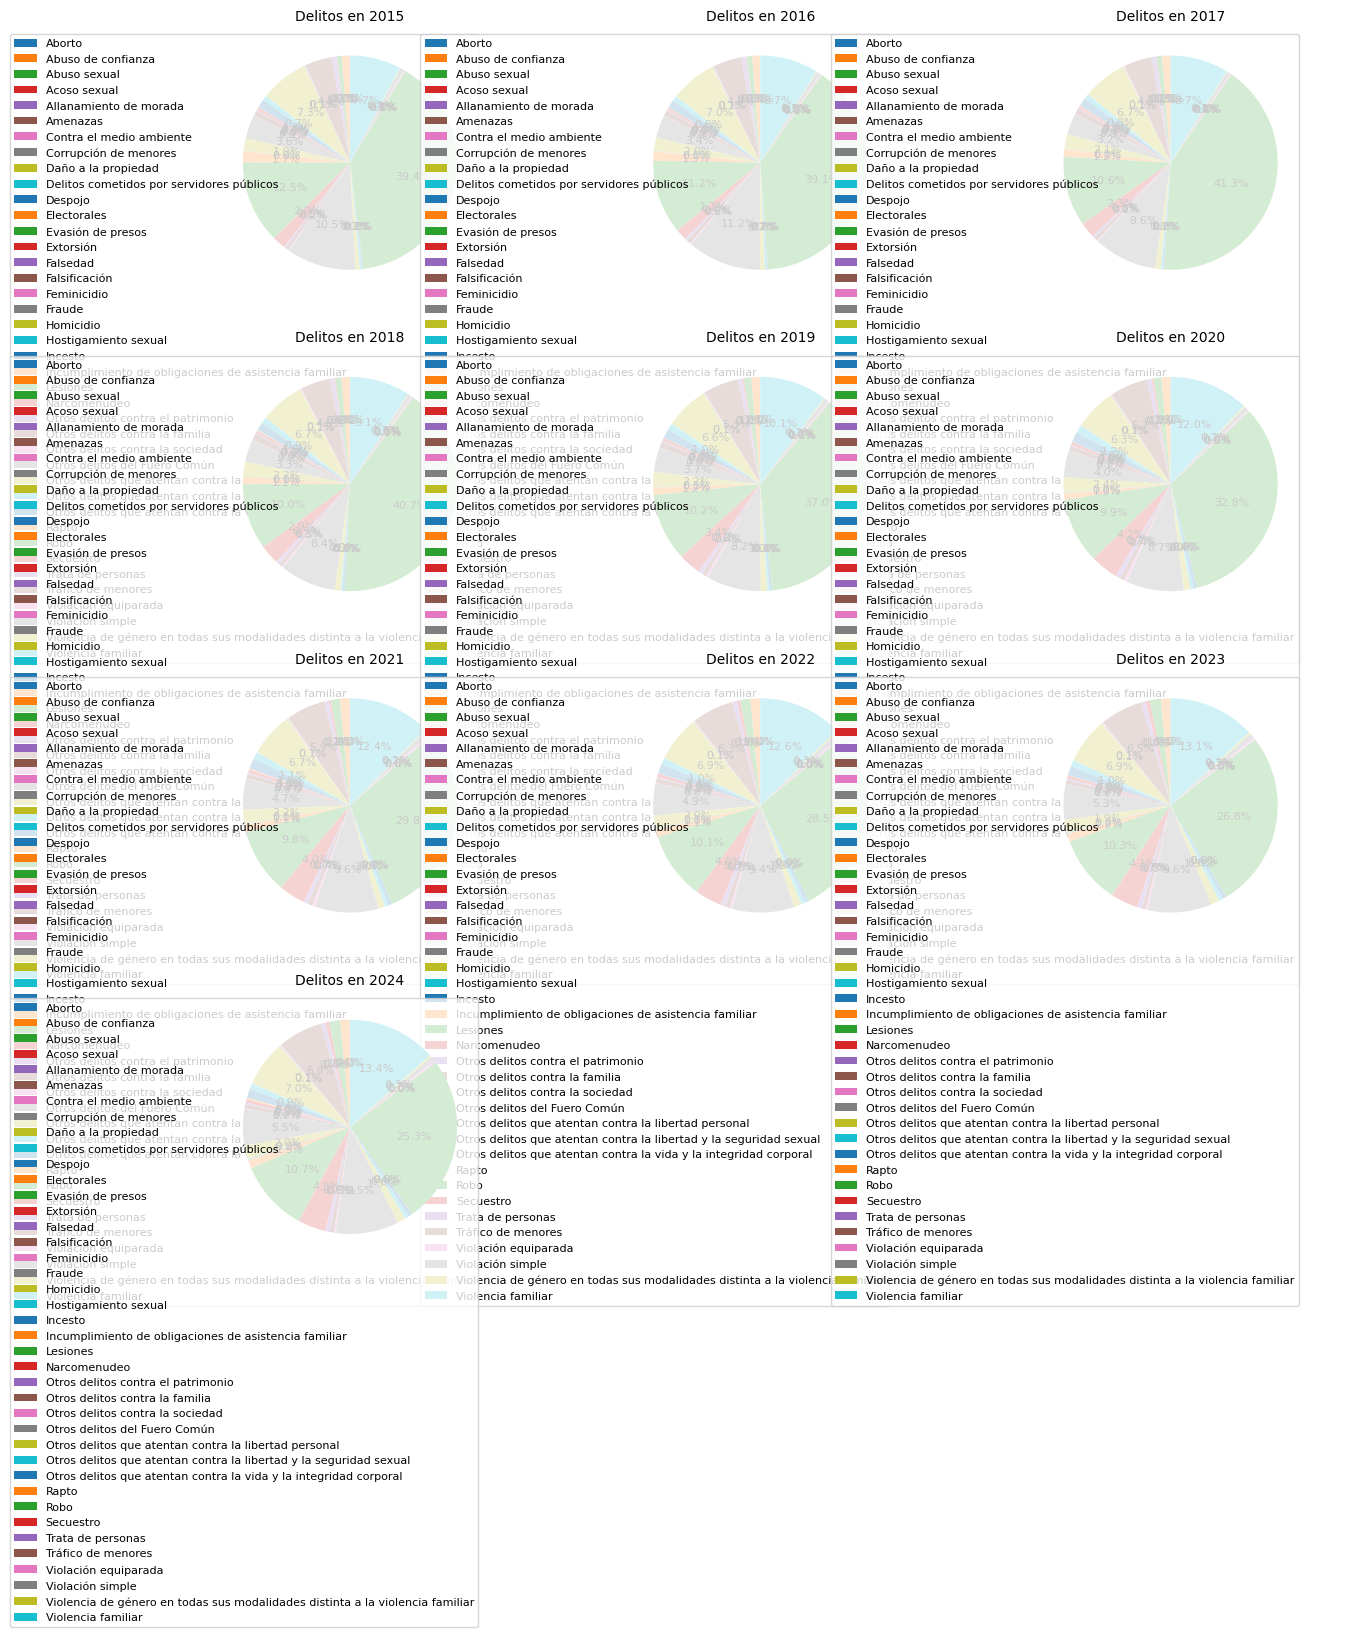

In [17]:

anios = df_agg.index
num_anios = len(anios)

ncols = 3
nrows = (num_anios + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()

for i, anio in enumerate(anios):
    axes[i].pie(df_agg.loc[anio], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes[i].set_title(f"Delitos en {anio}", fontsize=10)
    axes[i].legend(df_agg.columns, loc='upper right', fontsize=8)

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [21]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [22]:
pobs.head()

delitos_por_entidad = df.groupby(['anio', 'entidad'])['frecuencia'].sum().reset_index()
df_tasa = delitos_por_entidad.merge(pobs, on='entidad', how='left')
df_tasa['tasa'] = (df_tasa['frecuencia'] / df_tasa['poblacion']) * 100000
df_tasa['tasa_anualizada'] = df_tasa['tasa'] * 12
df_tasa[['anio', 'entidad', 'frecuencia', 'poblacion', 'tasa', 'tasa_anualizada']].head()

,anio,entidad,frecuencia,poblacion,tasa,tasa_anualizada
0,2015,Aguascalientes,23212.0,1312544.0,1768.474047,21221.688568
1,2015,Baja California,119944.0,3315766.0,3617.384339,43408.612067
2,2015,Baja California Sur,21415.0,712029.0,3007.602218,36091.226621
3,2015,Campeche,1886.0,899931.0,209.571623,2514.859473
4,2015,Chiapas,21618.0,8918653.0,242.390863,2908.690359
